## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164
...,...,...,...
2700,2024-10-01 00:00:00,php,732
2701,2024-10-01 00:00:00,python,3778
2702,2024-10-01 00:00:00,r,831
2703,2024-10-01 00:00:00,ruby,64


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape  # To show (rows,columns)

(2705, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     2705
TAG      2705
POSTS    2705
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
languages = df.iloc[:, 1].unique()
num_post_lang = {}
for language in languages:
    language_n = df[df.iloc[:, 1] == language]
    sum_value = int(language_n.iloc[:, 2].sum())
    num_post_lang[language] = sum_value
lan_df = pd.DataFrame.from_dict(num_post_lang, orient='index', columns=['POSTS'])
most_used_lan_df = lan_df.sort_values(by='POSTS', ascending=False)
most_used_lan_df

,POSTS
javascript,2532273
python,2207987
java,1918761
c#,1622339
php,1467552
c++,811628
r,509412
c,406522
swift,335493
ruby,229246


In [7]:
df.iloc[:, [1,2]].groupby('TAG').sum().sort_values(by='POSTS', ascending=False)

,POSTS
TAG,
javascript,2532273
python,2207987
java,1918761
c#,1622339
php,1467552
c++,811628
r,509412
c,406522
swift,335493


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,195,195
c,195,195
c#,196,196
c++,195,195
delphi,195,195
go,180,180
java,195,195
javascript,195,195
perl,195,195


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:,0]).dt.date

In [10]:
# df['DATE'] = pd.to_datetime(df['DATE'])

In [11]:
type(df.iloc[0,0])

datetime.date

In [12]:
df.head(15)

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164
5,2008-08-01,delphi,13
6,2008-08-01,java,221
7,2008-08-01,javascript,160
8,2008-08-01,perl,28
9,2008-08-01,php,157


## Data Manipulation



In [13]:
data = {
    'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
    'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
    'Power': [100, 80, 25, 50, 99, 75, 5, 30]
       }
test_df = pd.DataFrame(data=data)
test_df.pivot(values='Power', columns='Actor', index='Age')

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [14]:
reshape_df = df.pivot(values='POSTS', index='DATE', columns='TAG')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [15]:
reshape_df.head(5)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.00,82.00,503.00,164.00,13.00,NaN,221.00,160.00,28.00,157.00,119.00,NaN,68.00,NaN
2008-09-01,28.00,320.00,"1,640.00",753.00,104.00,NaN,"1,123.00",633.00,130.00,474.00,535.00,6.00,286.00,NaN
2008-10-01,16.00,303.00,"1,985.00",805.00,112.00,NaN,"1,146.00",720.00,128.00,603.00,505.00,NaN,246.00,NaN
2008-11-01,16.00,258.00,"1,729.00",733.00,139.00,NaN,954.00,581.00,97.00,497.00,447.00,1.00,154.00,NaN


In [16]:
reshape_df.shape

(196, 14)

In [17]:
reshape_df.count()

TAG
assembly      195
c             195
c#            196
c++           195
delphi        195
go            180
java          195
javascript    195
perl          195
php           195
python        195
r             193
ruby          195
swift         186
dtype: int64

In [18]:
reshape_df.fillna(0, inplace=True)

In [19]:
# reshape_df = reshape_df.fillna(0)

In [20]:
reshape_df.head(3)

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008-08-01,8.00,82.00,503.00,164.00,13.00,0.00,221.00,160.00,28.00,157.00,119.00,0.00,68.00,0.00
2008-09-01,28.00,320.00,"1,640.00",753.00,104.00,0.00,"1,123.00",633.00,130.00,474.00,535.00,6.00,286.00,0.00


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [21]:
reshape_df.count()

TAG
assembly      196
c             196
c#            196
c++           196
delphi        196
go            196
java          196
javascript    196
perl          196
php           196
python        196
r             196
ruby          196
swift         196
dtype: int64

In [22]:
reshape_df.sum()

TAG
assembly        44,817.00
c              406,522.00
c#           1,622,339.00
c++            811,628.00
delphi          52,251.00
go              73,929.00
java         1,918,761.00
javascript   2,532,273.00
perl            68,239.00
php          1,467,552.00
python       2,207,987.00
r              509,412.00
ruby           229,246.00
swift          335,493.00
dtype: float64

In [23]:
reshape_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

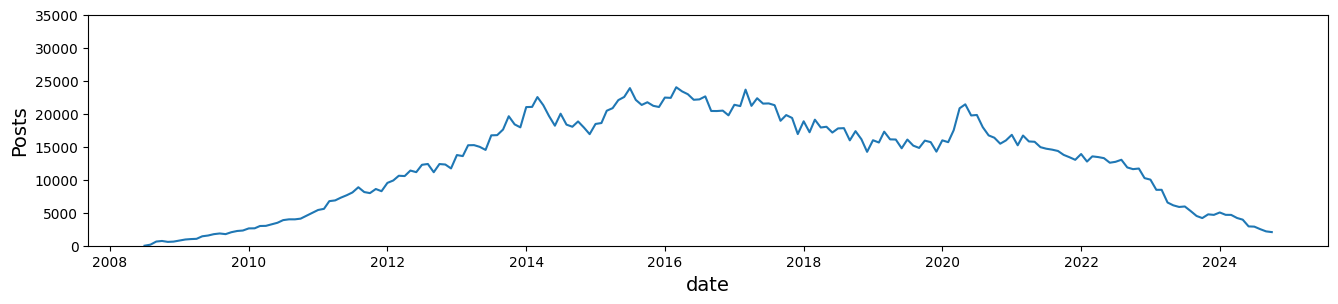

In [24]:
plt.figure(figsize=(16,3))
plt.ylabel('Posts', fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshape_df.index, reshape_df.javascript)

In [25]:
# plt.plot(reshape_df.index, reshape_df['python'])

In [26]:
# plt.plot(reshape_df.index, reshape_df.iloc[:,10])

In [27]:
# plt.plot(reshape_df.index, reshape_df.python, 'blue',  reshape_df.javascript, 'orange')

In [28]:
# print(reshape_df.columns)
# plt.plot(reshape_df.index, reshape_df.iloc[:, 7], 'orange' )
# plt.plot(reshape_df.index, reshape_df.[], 'blue')

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

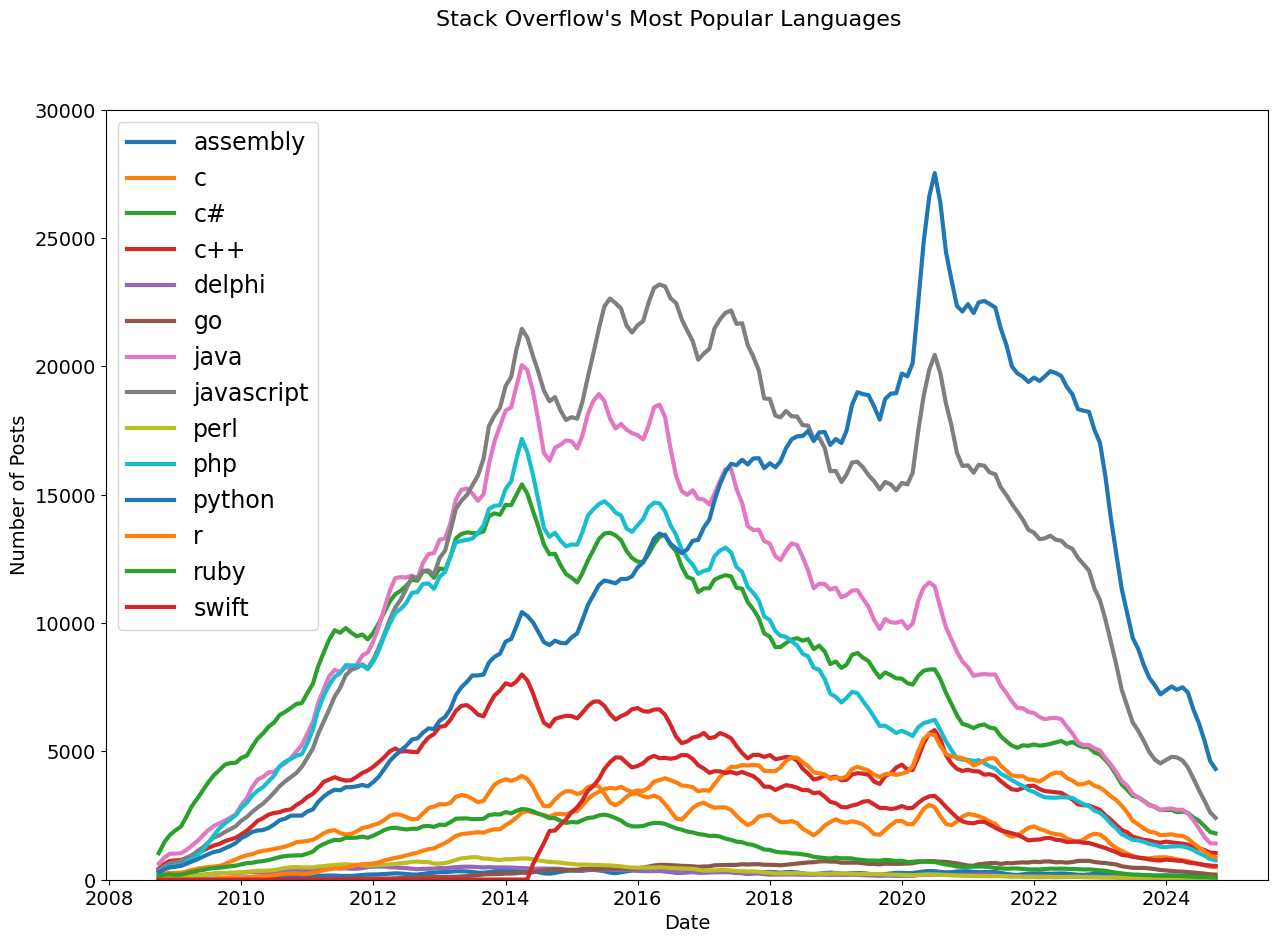

In [49]:
# The window is number of observations that are averaged
reshape_df_window = reshape_df.rolling(window=4).mean()

plt.figure(figsize=(15, 10))
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 30000)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(reshape_df_window.index, reshape_df_window.iloc[:, :],
         label=reshape_df.columns, linewidth=3,)
plt.suptitle("Stack Overflow's Most Popular Languages",fontsize=16)
plt.legend(loc='best', fontsize=17)


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 